In [1]:
import pandas as pd
import seaborn as sns
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Read data file
#data = pd.read_csv(r'C:\Users\sangh\Desktop\Research\Group Learning\Data to share\individual.csv') 
data = pd.read_csv(r'C:\Users\sangh\Desktop\Research\Group Learning\Data to share\Groups with DDM.csv') 
#data = pd.read_csv(r'C:\Users\sangh\Desktop\Research\Group Learning\Data to share\Groups with CDM.csv') 

In [23]:
# Parameter setting
ndim_phi = 100 # The number of grids for phi
ndim_tau = 100 # The number of grids for tau
samplesize = 1 # The sample size for random sampling for priors
T = 100 # The number of rounds (fixed)
nsample = 56 # The number of subjects; (Individual = 54, Group with DDM = 56, Group with CDM = 54)

In [24]:
# Dataframe for outcome
result = pd.DataFrame(columns = ['phi', 'tau', 'Log-likelihood'])

In [25]:
from tqdm import tqdm

In [26]:
phi_grid = []
tau_grid = []
Likelihood = []
heatmap = []
# Gridsearch
for i in tqdm(range(ndim_phi)):
    phi = 0.01 + i/ndim_phi
    for j in range(ndim_tau):
        tau = 0.05 + j/ndim_tau # Increase the minimum value when you encounter inf
        summ = 0
        for k in range(nsample):
            for sample in range(samplesize):
                for t in range(T):
                    if t == 0: # Initialize beliefs
                        #belief = [0.1+random.uniform(0,0.8), 0.1+random.uniform(0,0.8)] #Randomized priors; need greater samplesize and take longer 
                        belief = [0.5, 0.5] # priors are fixed at 0.5; samplesize=1
                    expbelief = [math.exp(belief[0]/tau),math.exp(belief[1]/tau)] 
                    prob_A = expbelief[0]/(expbelief[0] + expbelief[1]) # Soft-max choice rule
                    if data.iloc[k*100+t,2] == 0:
                        summ += np.log(prob_A) # Add likelihood
                        belief[0] = (1-phi)*belief[0] + phi*data.iloc[k*100+t,3] # Exponential weighted averaging
                    else:
                        summ += np.log(1-prob_A) # Add likelihood
                        belief[1] = (1-phi)*belief[1] + phi*data.iloc[k*100+t,3] # Exponential weighted averaging
        phi_grid.append("{:.2f}".format(phi)) # Store parameter
        tau_grid.append("{:.2f}".format(tau)) # Store parameter
        Likelihood.append(summ) # Store likelihood
result['phi'] = phi_grid
result['tau'] = tau_grid
result['Log-likelihood'] = Likelihood

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:03:38<00:00, 38.19s/it]


In [27]:
maxLL = max(result['Log-likelihood'])

In [28]:
z = (-2)*(result['Log-likelihood'] - maxLL)

In [29]:
z[z>50]= np.nan

In [30]:
result['Log-likelihood Ratio'] = z

In [31]:
optimal = result[result['Log-likelihood Ratio'].values == 0]

In [ ]:
print(optimal)

In [36]:
heatmap_data = pd.pivot_table(result[['phi','tau','Log-likelihood Ratio']], values='Log-likelihood Ratio', index=['tau'], columns='phi')

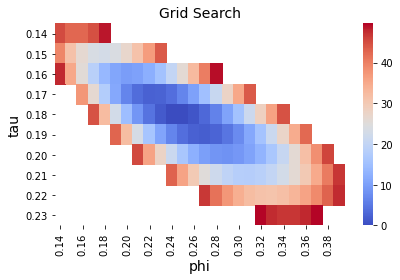

In [43]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("phi", size=14)
plt.ylabel("tau", size=14)
plt.title("Grid Search", size=14)
plt.tight_layout()